In [147]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')

In [148]:
file2 = pd.read_csv("../2_obs_sta_jja_pre_553_1961_2005.csv", encoding='ansi')
file2.head()

,year,mon,day,X50353,X50434,X50468,X50514,X50527,X50548,X50557,...,X59673,X59754,X59758,X59838,X59845,X59849,X59855,X59948,X59954,X59981
0,1961,6,1,0.01,0.000000,0.00,0.00,0.00,0.01,0.00,...,0.020000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
1,1961,6,2,0.00,0.010000,0.01,0.01,0.01,0.00,0.40,...,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.600000,0.00,0.00,0.00
2,1961,6,3,0.00,0.010000,0.81,0.00,0.00,0.40,0.11,...,118.800003,3.90,5.20,0.010000,0.010000,36.299999,32.400002,0.80,1.71,0.00
3,1961,6,4,0.00,0.000000,3.90,0.00,0.00,1.00,0.90,...,3.500000,6.31,0.50,40.300003,0.310000,2.200000,1.700000,9.81,0.50,0.31
4,1961,6,5,1.01,8.400001,0.40,2.60,0.01,1.90,0.01,...,12.900001,3.80,0.11,0.000000,29.300001,26.600000,0.000000,0.40,0.20,13.10


In [149]:
def transform_date(x):
    return str(x[0])+'-'+str(x[1])+'-'+str(x[2])

In [150]:
# file2['date'] = file2[['year', 'mon', 'day']].apply(transform_date, axis=1)

In [151]:
#file2.date = pd.to_datetime(file2.date)

In [152]:
#file2.drop(['year','mon','day'], axis=1, inplace=True)

# 计算全国95%分位点的阈值

In [153]:
file2.head()

,year,mon,day,X50353,X50434,X50468,X50514,X50527,X50548,X50557,...,X59673,X59754,X59758,X59838,X59845,X59849,X59855,X59948,X59954,X59981
0,1961,6,1,0.01,0.000000,0.00,0.00,0.00,0.01,0.00,...,0.020000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
1,1961,6,2,0.00,0.010000,0.01,0.01,0.01,0.00,0.40,...,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.600000,0.00,0.00,0.00
2,1961,6,3,0.00,0.010000,0.81,0.00,0.00,0.40,0.11,...,118.800003,3.90,5.20,0.010000,0.010000,36.299999,32.400002,0.80,1.71,0.00
3,1961,6,4,0.00,0.000000,3.90,0.00,0.00,1.00,0.90,...,3.500000,6.31,0.50,40.300003,0.310000,2.200000,1.700000,9.81,0.50,0.31
4,1961,6,5,1.01,8.400001,0.40,2.60,0.01,1.90,0.01,...,12.900001,3.80,0.11,0.000000,29.300001,26.600000,0.000000,0.40,0.20,13.10


In [154]:
file2.drop(['mon', 'day'], axis=1, inplace=True)

In [155]:
file2=file2.groupby('year').mean()

In [156]:
file2.reset_index(inplace=True)

In [157]:
file2.drop(['year'], axis=1, inplace=True)
file2 = file2.T
file2.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
X50353,3.520652,3.834891,3.268587,2.300000,2.554239,4.609022,3.344891,2.230544,3.596196,2.506522,...,4.136739,2.964131,2.010978,2.532174,3.144565,2.361196,2.514783,4.313804,2.993044,1.784565
X50434,3.037609,2.914348,3.392826,2.297826,2.644022,3.664674,3.929783,2.630109,4.119239,3.464674,...,4.468044,3.944674,3.063913,2.825326,2.316413,2.277717,1.758804,3.399891,1.626087,2.147935
X50468,3.264891,4.983913,5.563152,2.896848,2.624891,3.967283,4.045652,4.092500,3.992717,2.808804,...,3.266739,5.088152,3.871413,4.769565,2.700326,2.249239,3.525326,5.760326,2.641957,1.637826
X50514,2.280544,2.687500,2.308696,2.936304,1.605109,2.240435,1.959674,1.515000,1.682935,2.252717,...,3.002065,1.910000,5.567826,1.362391,1.643478,0.813913,2.621087,1.488478,0.464674,0.973152
X50527,2.764565,3.448044,2.629783,2.243587,1.918044,2.849783,3.033152,1.608696,2.599674,2.416522,...,3.615217,2.895217,3.101957,1.777500,3.216631,1.837826,2.425761,2.186087,2.024131,2.148913


In [158]:
# 求每年的阈值
thresholds = []
thre_rate = 0.95
for i in range(file2.shape[1]):
    vals = np.sort(file2[i].values)
    thresholds.append(vals[int(thre_rate*len(vals))])

In [159]:
len(thresholds)

45

In [160]:
thresholds = pd.DataFrame({'val':np.array(thresholds)})

In [161]:
#thresholds.to_csv("thresholds.csv")

In [162]:
np.linspace(1961,2005,45)

array([1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.])

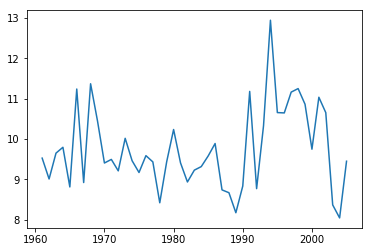

In [163]:
plt.plot(np.linspace(1961,2005,45),thresholds)

In [164]:
import matplotlib.ticker as plticker

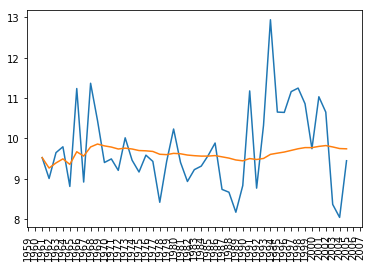

In [165]:

threshold_mean = [thresholds.val.values[0]]
for i in range(len(thresholds)-1):
    threshold_mean.append((threshold_mean[i]*(i+1)+thresholds.val.values[i+1])/(i+2))
fig, ax = plt.subplots()
ax.plot(np.linspace(1961,2005,45),thresholds)
ax.plot(np.linspace(1961,2005,45),threshold_mean)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=90)
plt.show()

# 降水强度

In [166]:
file2.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
X50353,3.520652,3.834891,3.268587,2.300000,2.554239,4.609022,3.344891,2.230544,3.596196,2.506522,...,4.136739,2.964131,2.010978,2.532174,3.144565,2.361196,2.514783,4.313804,2.993044,1.784565
X50434,3.037609,2.914348,3.392826,2.297826,2.644022,3.664674,3.929783,2.630109,4.119239,3.464674,...,4.468044,3.944674,3.063913,2.825326,2.316413,2.277717,1.758804,3.399891,1.626087,2.147935
X50468,3.264891,4.983913,5.563152,2.896848,2.624891,3.967283,4.045652,4.092500,3.992717,2.808804,...,3.266739,5.088152,3.871413,4.769565,2.700326,2.249239,3.525326,5.760326,2.641957,1.637826
X50514,2.280544,2.687500,2.308696,2.936304,1.605109,2.240435,1.959674,1.515000,1.682935,2.252717,...,3.002065,1.910000,5.567826,1.362391,1.643478,0.813913,2.621087,1.488478,0.464674,0.973152
X50527,2.764565,3.448044,2.629783,2.243587,1.918044,2.849783,3.033152,1.608696,2.599674,2.416522,...,3.615217,2.895217,3.101957,1.777500,3.216631,1.837826,2.425761,2.186087,2.024131,2.148913


In [168]:
intensity = file2.mean()

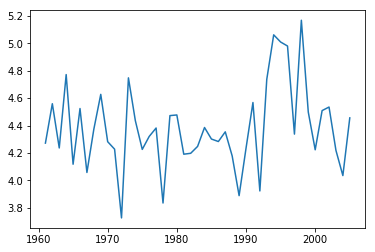

In [169]:
plt.plot(np.linspace(1961,2005,45),intensity)

In [175]:
intensity.to_csv("intensity.csv")

# 湿日总降水量



In [171]:
file2.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
X50353,3.520652,3.834891,3.268587,2.300000,2.554239,4.609022,3.344891,2.230544,3.596196,2.506522,...,4.136739,2.964131,2.010978,2.532174,3.144565,2.361196,2.514783,4.313804,2.993044,1.784565
X50434,3.037609,2.914348,3.392826,2.297826,2.644022,3.664674,3.929783,2.630109,4.119239,3.464674,...,4.468044,3.944674,3.063913,2.825326,2.316413,2.277717,1.758804,3.399891,1.626087,2.147935
X50468,3.264891,4.983913,5.563152,2.896848,2.624891,3.967283,4.045652,4.092500,3.992717,2.808804,...,3.266739,5.088152,3.871413,4.769565,2.700326,2.249239,3.525326,5.760326,2.641957,1.637826
X50514,2.280544,2.687500,2.308696,2.936304,1.605109,2.240435,1.959674,1.515000,1.682935,2.252717,...,3.002065,1.910000,5.567826,1.362391,1.643478,0.813913,2.621087,1.488478,0.464674,0.973152
X50527,2.764565,3.448044,2.629783,2.243587,1.918044,2.849783,3.033152,1.608696,2.599674,2.416522,...,3.615217,2.895217,3.101957,1.777500,3.216631,1.837826,2.425761,2.186087,2.024131,2.148913


In [172]:
file = pd.read_csv("../2_obs_sta_jja_pre_553_1961_2005.csv", encoding='ansi')
file.head()

,year,mon,day,X50353,X50434,X50468,X50514,X50527,X50548,X50557,...,X59673,X59754,X59758,X59838,X59845,X59849,X59855,X59948,X59954,X59981
0,1961,6,1,0.01,0.000000,0.00,0.00,0.00,0.01,0.00,...,0.020000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
1,1961,6,2,0.00,0.010000,0.01,0.01,0.01,0.00,0.40,...,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.600000,0.00,0.00,0.00
2,1961,6,3,0.00,0.010000,0.81,0.00,0.00,0.40,0.11,...,118.800003,3.90,5.20,0.010000,0.010000,36.299999,32.400002,0.80,1.71,0.00
3,1961,6,4,0.00,0.000000,3.90,0.00,0.00,1.00,0.90,...,3.500000,6.31,0.50,40.300003,0.310000,2.200000,1.700000,9.81,0.50,0.31
4,1961,6,5,1.01,8.400001,0.40,2.60,0.01,1.90,0.01,...,12.900001,3.80,0.11,0.000000,29.300001,26.600000,0.000000,0.40,0.20,13.10


In [174]:
file.drop(['mon', 'day'], axis=1, inplace=True)
file.iloc[0]
# cao, 感觉还是matlab用着顺手

year      1961.000000
X50353       0.010000
X50434       0.000000
X50468       0.000000
X50514       0.000000
X50527       0.000000
X50548       0.010000
X50557       0.000000
X50564       0.000000
X50603       0.000000
X50618       0.000000
X50632       0.000000
X50639       0.200000
X50656       0.000000
X50658       0.000000
X50727       0.000000
X50742       0.000000
X50745       0.000000
X50756       0.000000
X50758       0.000000
X50774       0.000000
X50775       0.000000
X50788       0.000000
X50834       0.000000
X50844       0.000000
X50853       0.000000
X50854       0.000000
X50862       0.000000
X50877       0.000000
X50888       0.600000
             ...     
X59303      15.300000
X59316       5.710001
X59317       0.100000
X59321       0.700000
X59417       0.000000
X59431       0.000000
X59446       0.000000
X59453       0.000000
X59456       0.020000
X59462       0.000000
X59478       0.810000
X59493       0.210000
X59501       0.010000
X59626       0.000000
X59632    

In [251]:
from pyecharts.charts import Geo, Map

In [178]:
file1 = pd.read_csv("../1_obs_model_sta_latlon.csv", encoding='ansi')
file2 = pd.read_csv("../2_obs_sta_jja_pre_553_1961_2005.csv", encoding='ansi')

In [188]:
V1 = pd.read_excel("V1.xlsx",header=None)
V2 = pd.read_excel("V2.xlsx",header=None)
V3 = pd.read_excel("V3.xlsx",header=None)
V4 = pd.read_excel("V4.xlsx",header=None)
V5 = pd.read_excel("V5.xlsx",header=None)
V6 = pd.read_excel("V6.xlsx",header=None)

IndexError: list assignment index out of range

In [189]:
file1['V1'] = V1[0].values
file1['V2'] = V2[0].values
file1['V3'] = V3[0].values
file1['V4'] = V4[0].values
file1['V5'] = V5[0].values
file1['V6'] = V6[0].values

In [190]:
file1.head()

,sn,name,province,lon,lat,height,V1,V2,V3,V4,V5,V6
0,50353,呼玛,黑龙江,126.650,51.717,177.4,-0.021772,-0.024027,0.015032,-0.007175,-0.025572,-0.025602
1,50434,图里河,内蒙古,121.683,50.483,732.6,-0.020041,-0.029230,0.026434,0.012249,-0.030491,-0.027697
2,50468,黑河,黑龙江,127.450,50.250,166.4,-0.012980,-0.017218,0.012707,-0.008659,-0.019893,-0.019132
3,50514,满洲里,内蒙古,117.433,49.567,661.7,-0.035476,-0.034179,0.011238,-0.017876,-0.031503,-0.033935
4,50527,海拉尔,内蒙古,119.750,49.217,610.2,-0.029986,-0.030516,0.013093,-0.014518,-0.034713,-0.034563


In [269]:
data = []
v1val = file1.V1.values
for x,y in zip(file1.name.values, (v1val-v1val.min())*100/(v1val.max()-v1val.min())):
    data.append((x,y))

In [228]:
import json
jsoninfo = json.dumps(data_dict,ensure_ascii=False) # 输出str类型
f = open('info.json', 'w')
f.write(jsoninfo)

C:\Users\Glaucous\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.TextIOWrapper name='info.json' mode='w' encoding='cp936'>
  This is separate from the ipykernel package so we can avoid doing imports until


17801

In [258]:
from pyecharts import options as opts
from pyecharts.globals import ChartType, SymbolType

In [270]:
c=(
    
    Geo()
    .add_coordinate_json(r'C:/Users/Glaucous/Desktop/数模exercise/第一次训练/第二题/info.json')
    .add_schema(maptype="china")
    .add("geo", data)
    .set_series_opts(
    label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
    visualmap_opts=opts.VisualMapOpts(),
    title_opts=opts.TitleOpts(title="湿日总降水量"))
    
)
c.render_notebook()

C:\Users\Glaucous\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [271]:
c.render('湿日总降水量.html')

'C:\\Users\\Glaucous\\Desktop\\数模exercise\\第一次训练\\第二题\\湿日总降水量.html'

In [262]:
help(c.render)

Help on method render in module pyecharts.charts.base:

render(path: str = 'render.html', template_name: str = 'simple_chart.html', env: Union[jinja2.environment.Environment, NoneType] = None, **kwargs) -> str method of pyecharts.charts.basic_charts.geo.Geo instance



In [272]:
data = []
v1val = file1.V2.values
for x,y in zip(file1.name.values, (v1val-v1val.min())*100/(v1val.max()-v1val.min())):
    data.append((x,y))
c=(
    
    Geo()
    .add_coordinate_json(r'C:/Users/Glaucous/Desktop/数模exercise/第一次训练/第二题/info.json')
    .add_schema(maptype="china")
    .add("geo", data)
    .set_series_opts(
    label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
    visualmap_opts=opts.VisualMapOpts(),
    title_opts=opts.TitleOpts(title="极端降水期日均降水期(SDII)"))
    
)
c.render_notebook()
c.render('极端降水期日均降水期(SDII).html')

C:\Users\Glaucous\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\Glaucous\\Desktop\\数模exercise\\第一次训练\\第二题\\极端降水期日均降水期(SDII).html'

In [273]:
data = []
v1val = file1.V3.values
for x,y in zip(file1.name.values, (v1val-v1val.min())*100/(v1val.max()-v1val.min())):
    data.append((x,y))
c=(
    
    Geo()
    .add_coordinate_json(r'C:/Users/Glaucous/Desktop/数模exercise/第一次训练/第二题/info.json')
    .add_schema(maptype="china")
    .add("geo", data)
    .set_series_opts(
    label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
    visualmap_opts=opts.VisualMapOpts(),
    title_opts=opts.TitleOpts(title="连续干日数(CDD)"))
    
)
c.render_notebook()
c.render('cdd.html')

C:\Users\Glaucous\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\Glaucous\\Desktop\\数模exercise\\第一次训练\\第二题\\cdd.html'

In [274]:
data = []
v1val = file1.V4.values
for x,y in zip(file1.name.values, (v1val-v1val.min())*100/(v1val.max()-v1val.min())):
    data.append((x,y))
c=(
    
    Geo()
    .add_coordinate_json(r'C:/Users/Glaucous/Desktop/数模exercise/第一次训练/第二题/info.json')
    .add_schema(maptype="china")
    .add("geo", data)
    .set_series_opts(
    label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
    visualmap_opts=opts.VisualMapOpts(),
    title_opts=opts.TitleOpts(title="连续湿日数(CWD)"))
    
)
c.render_notebook()
c.render('cwd.html')

C:\Users\Glaucous\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\Glaucous\\Desktop\\数模exercise\\第一次训练\\第二题\\cwd.html'

In [275]:
data = []
v1val = file1.V5.values
for x,y in zip(file1.name.values, (v1val-v1val.min())*100/(v1val.max()-v1val.min())):
    data.append((x,y))
c=(
    
    Geo()
    .add_coordinate_json(r'C:/Users/Glaucous/Desktop/数模exercise/第一次训练/第二题/info.json')
    .add_schema(maptype="china")
    .add("geo", data)
    .set_series_opts(
    label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
    visualmap_opts=opts.VisualMapOpts(),
    title_opts=opts.TitleOpts(title="最大的日降水量(Rx1day)"))
    
)
c.render_notebook()
c.render('rx1.html')

C:\Users\Glaucous\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\Glaucous\\Desktop\\数模exercise\\第一次训练\\第二题\\rx1.html'

In [276]:
data = []
v1val = file1.V6.values
for x,y in zip(file1.name.values, (v1val-v1val.min())*100/(v1val.max()-v1val.min())):
    data.append((x,y))
c=(
    
    Geo()
    .add_coordinate_json(r'C:/Users/Glaucous/Desktop/数模exercise/第一次训练/第二题/info.json')
    .add_schema(maptype="china")
    .add("geo", data)
    .set_series_opts(
    label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
    visualmap_opts=opts.VisualMapOpts(),
    title_opts=opts.TitleOpts(title="最大的连续5日降水量(Rx5day)"))
    
)
c.render_notebook()
c.render('rx5.html')

C:\Users\Glaucous\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\Glaucous\\Desktop\\数模exercise\\第一次训练\\第二题\\rx5.html'